In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale = 2)


In [33]:
df = pd.read_csv("results-other.csv")
df_lptml = pd.read_csv("reformatted_results.csv")

df_lptml = df_lptml[df_lptml["PCA"] == 4]
#df_lptml["dataset_name"] = df_lptml[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
df_lptml.rename(columns={
    "avg_precision": "precision",
    "avg_recall": "recall",
    "avg_f1": "f1",
    "avg_accuracy": "accuracy",
}, inplace=True)
# Drop for now std
df_lptml = df_lptml[["algorithm","dataset_name","dataset_dimensions(elements|features|classes)","PCA","adversarial_noise","accuracy", "precision","recall","f1"]]
df_lptml.head()

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1
1,LPTML,breast_cancer,(699|9|2),4,0.1,0.949,0.943,0.946,0.944
3,LPTML,breast_cancer,(699|9|2),4,0.2,0.965,0.959,0.963,0.961
5,LPTML,breast_cancer,(699|9|2),4,0.3,0.965,0.959,0.963,0.961
7,LPTML,vehicle,(846|18|4),4,0.1,0.484,0.489,0.489,0.479
9,LPTML,vehicle,(846|18|4),4,0.2,0.496,0.501,0.501,0.492


In [34]:

df = df[df["PCA"] == 4]
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("_Supervised", ""))
#df["dataset_name"] = df[["dataset_name", "dataset_dimensions(elements|features|classes)"]].apply(lambda x: x["dataset_name"] + " " + x["dataset_dimensions(elements|features|classes)"].replace("|",","), axis=1)
#df.head()

df = df.append(df_lptml)
df.describe(include="all")

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,accuracy,precision,recall,f1
count,231,231,231,231.0,231.000000,231.000000,231.000000,231.000000,231.000000
unique,9,7,7,NaN,NaN,NaN,NaN,NaN,NaN
top,LPTML,vehicle,(699|9|2),NaN,NaN,NaN,NaN,NaN,NaN
freq,28,36,36,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.0,0.149351,0.628354,0.617613,0.613402,0.607648
std,NaN,NaN,NaN,0.0,0.111850,0.188186,0.186327,0.185192,0.187350
min,NaN,NaN,NaN,4.0,0.000000,0.103000,0.092000,0.108000,0.083000
25%,NaN,NaN,NaN,4.0,0.050000,0.519547,0.521358,0.521144,0.513622
50%,NaN,NaN,NaN,4.0,0.100000,0.587500,0.576618,0.580645,0.575314
75%,NaN,NaN,NaN,4.0,0.200000,0.719000,0.682287,0.670540,0.657806


In [35]:
# Accuracy plot
# plt.figure(figsize=(40, 20))
# accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy"]]
# sns.barplot(x="dataset_name", y="accuracy", data=accuracy_df[accuracy_df["adversarial_noise"] == 0.0], hue="algorithm")

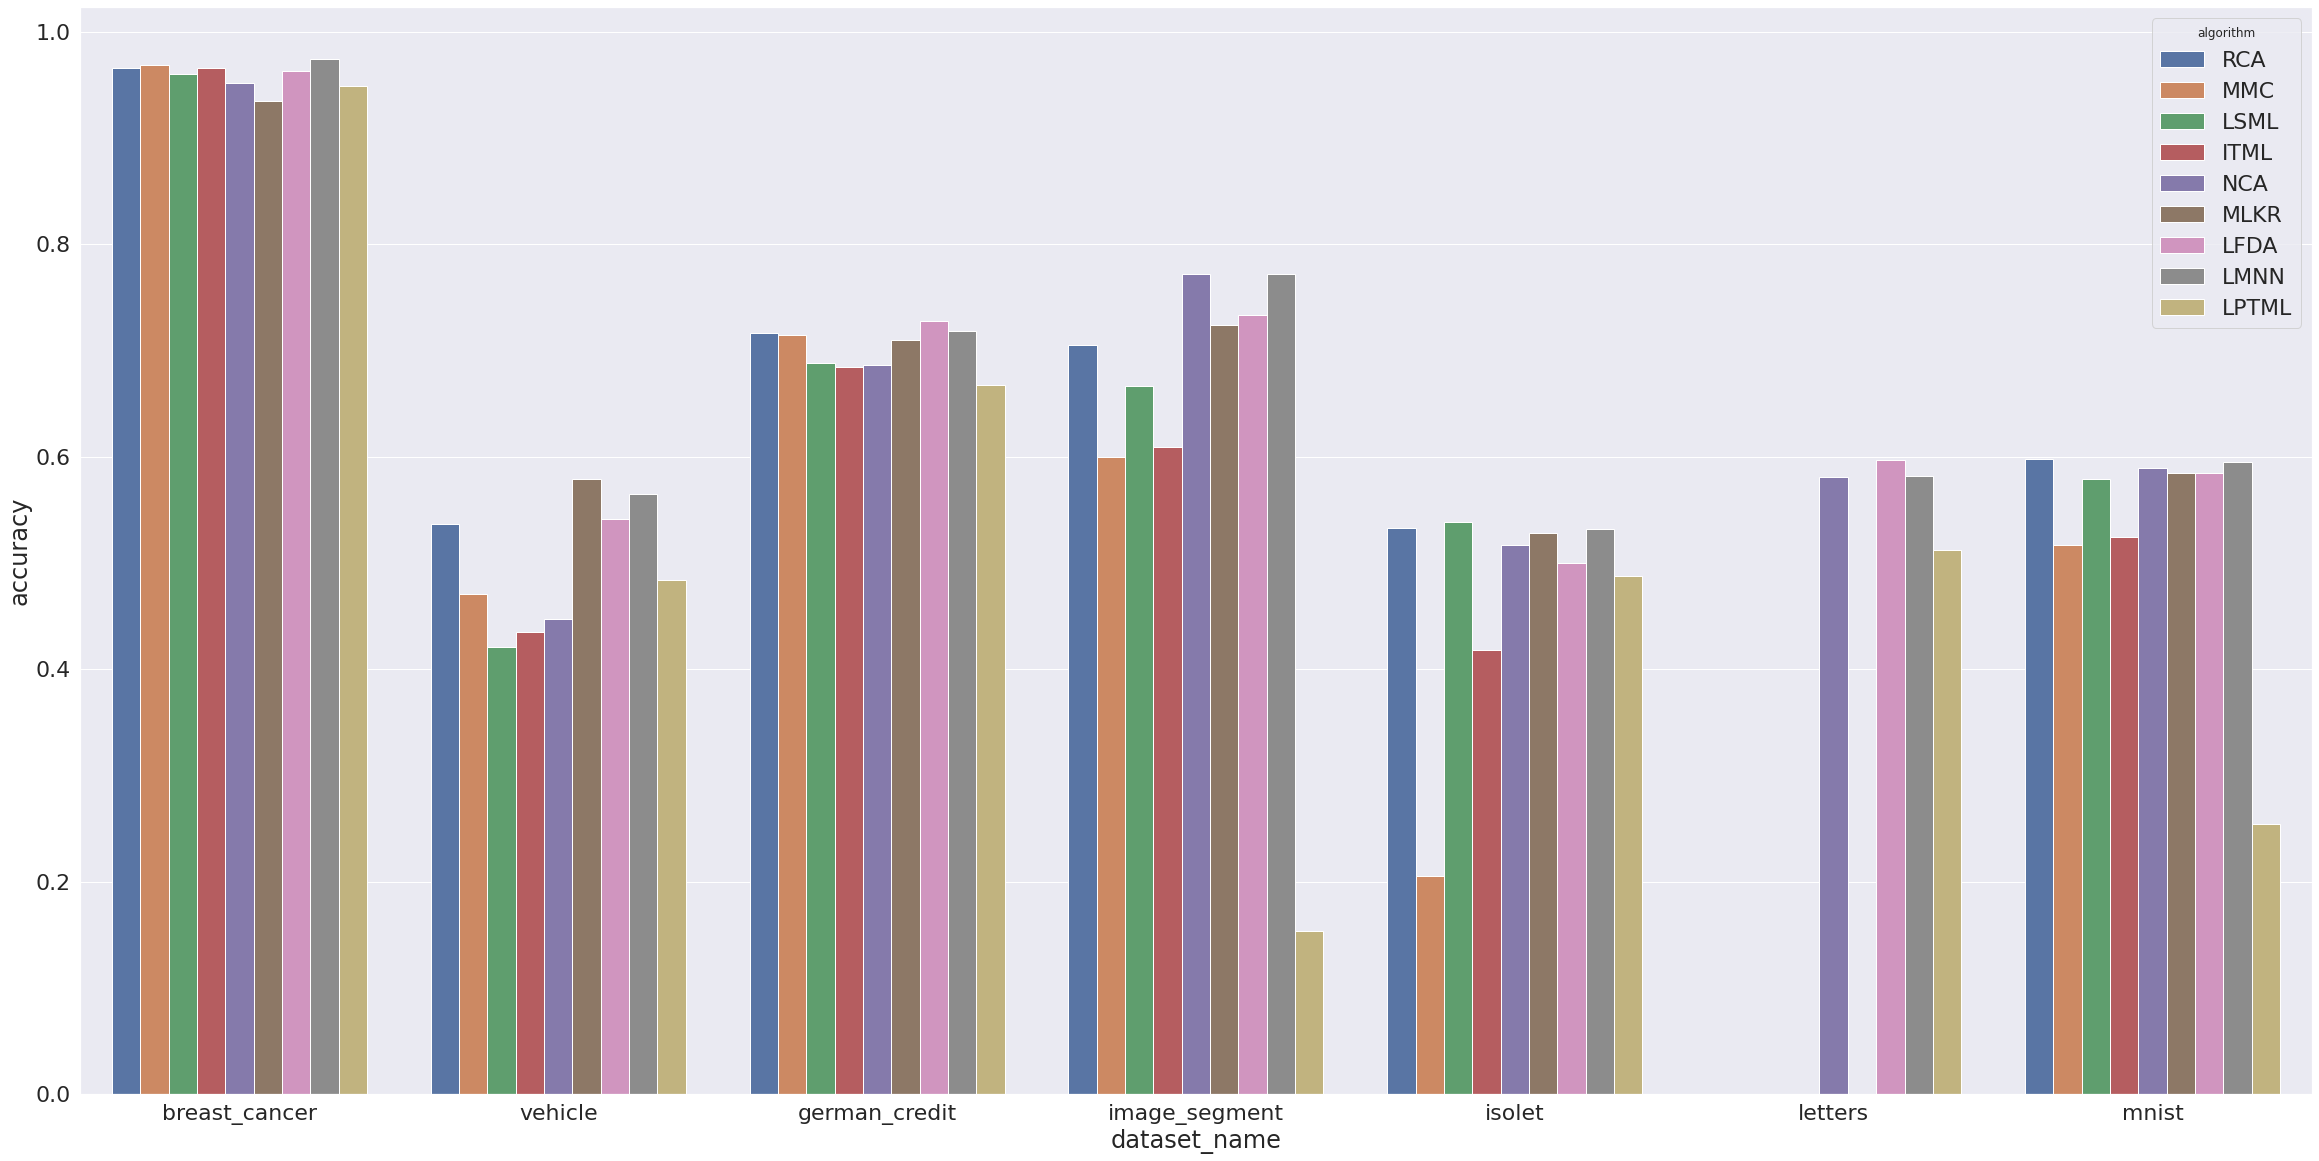

In [36]:
# Accuracy plot
plt.figure(figsize=(40, 20))
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy"]]
sns.barplot(x="dataset_name", y="accuracy", data=accuracy_df[accuracy_df["adversarial_noise"] == 0.1], hue="algorithm")


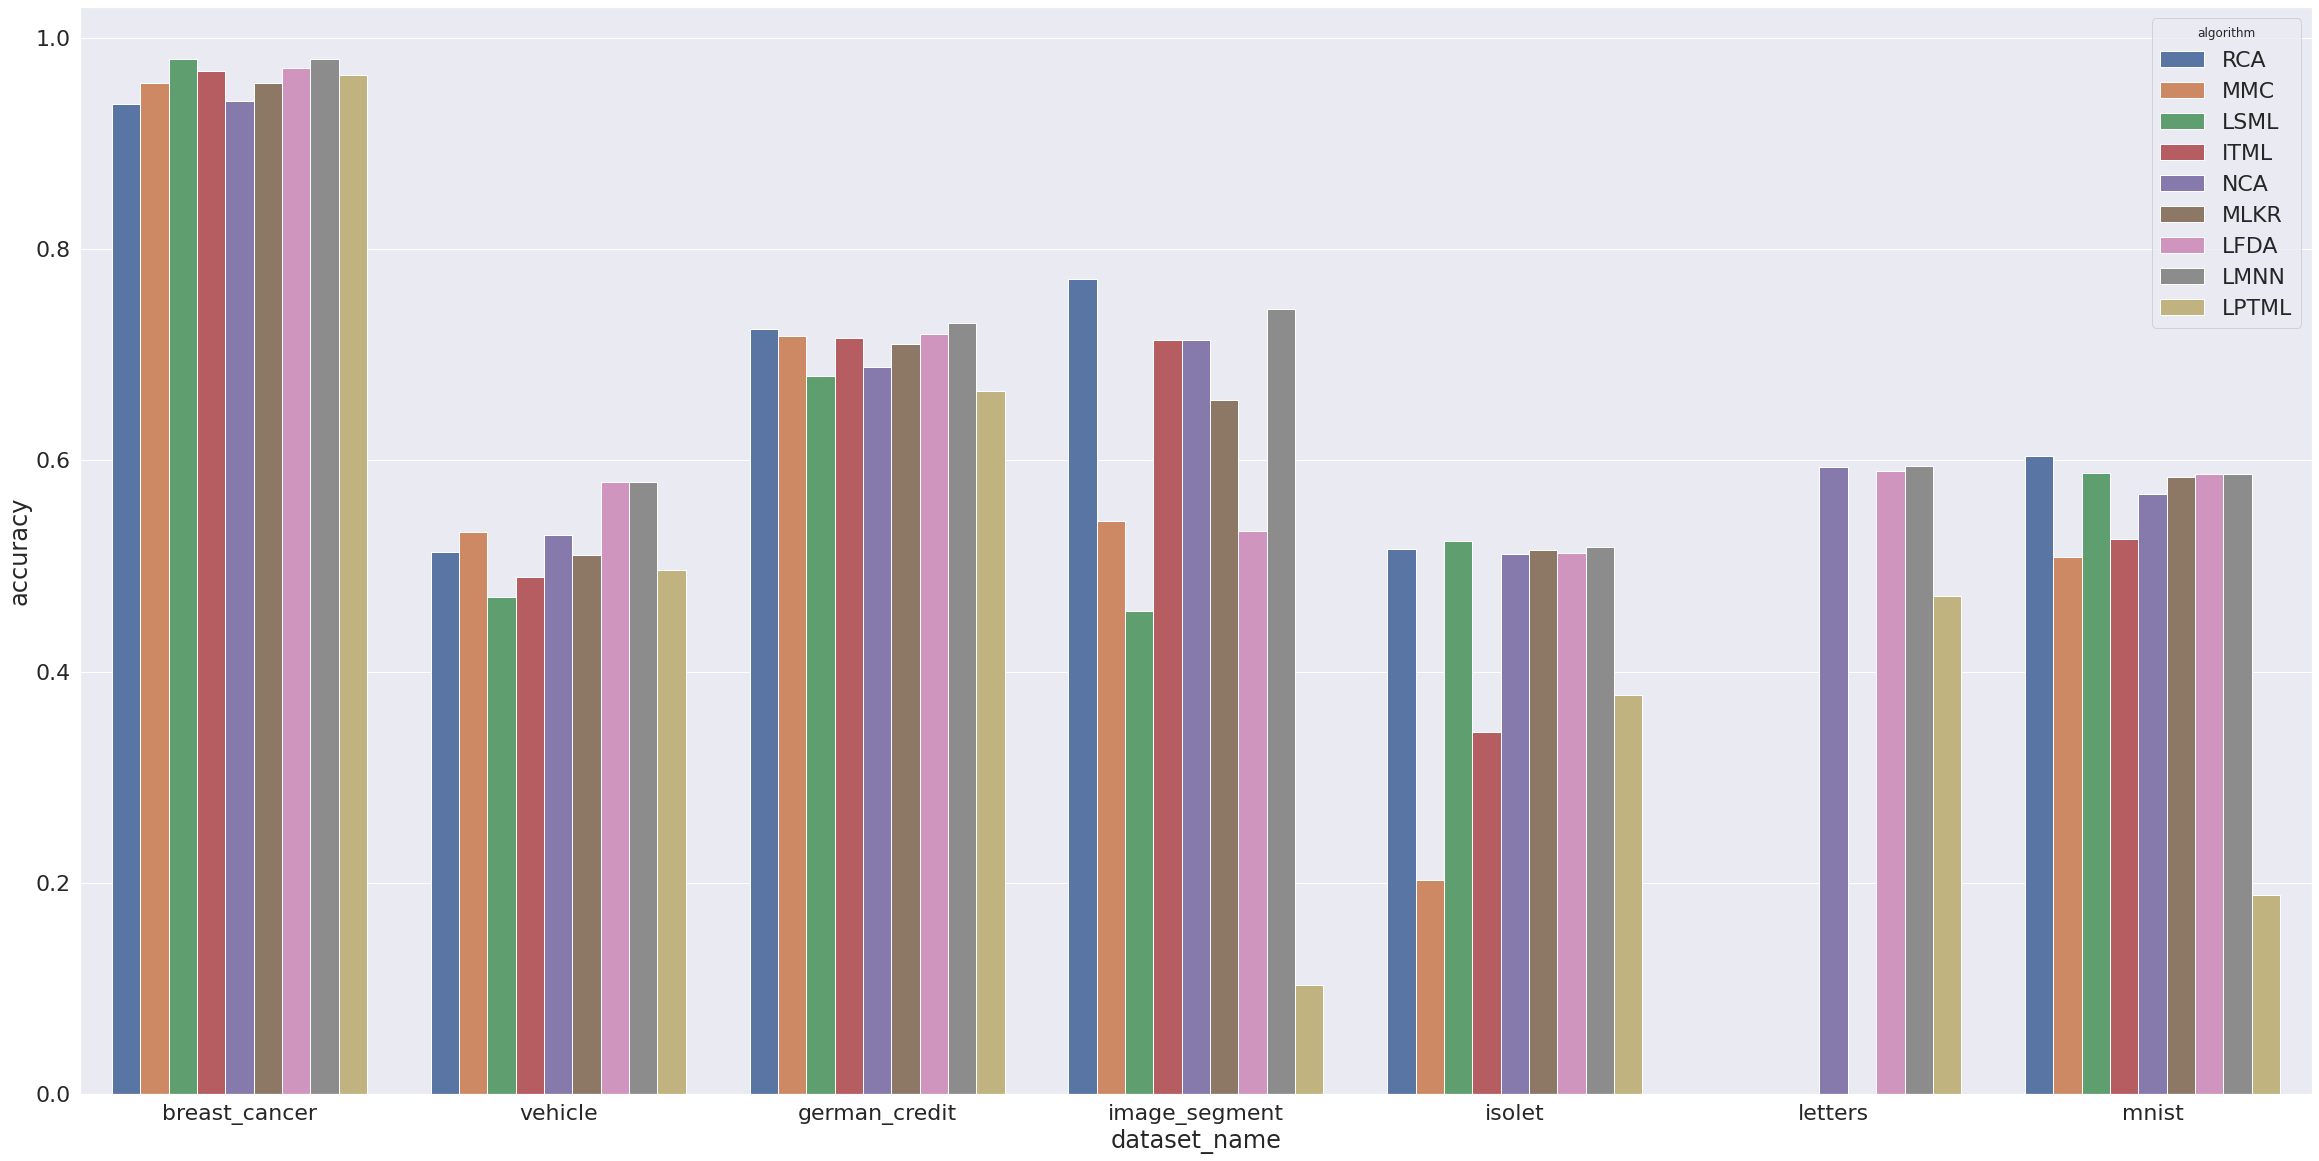

In [37]:
# Accuracy plot
plt.figure(figsize=(40, 20))
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy"]]
sns.barplot(x="dataset_name", y="accuracy", data=accuracy_df[accuracy_df["adversarial_noise"] == 0.2], hue="algorithm")


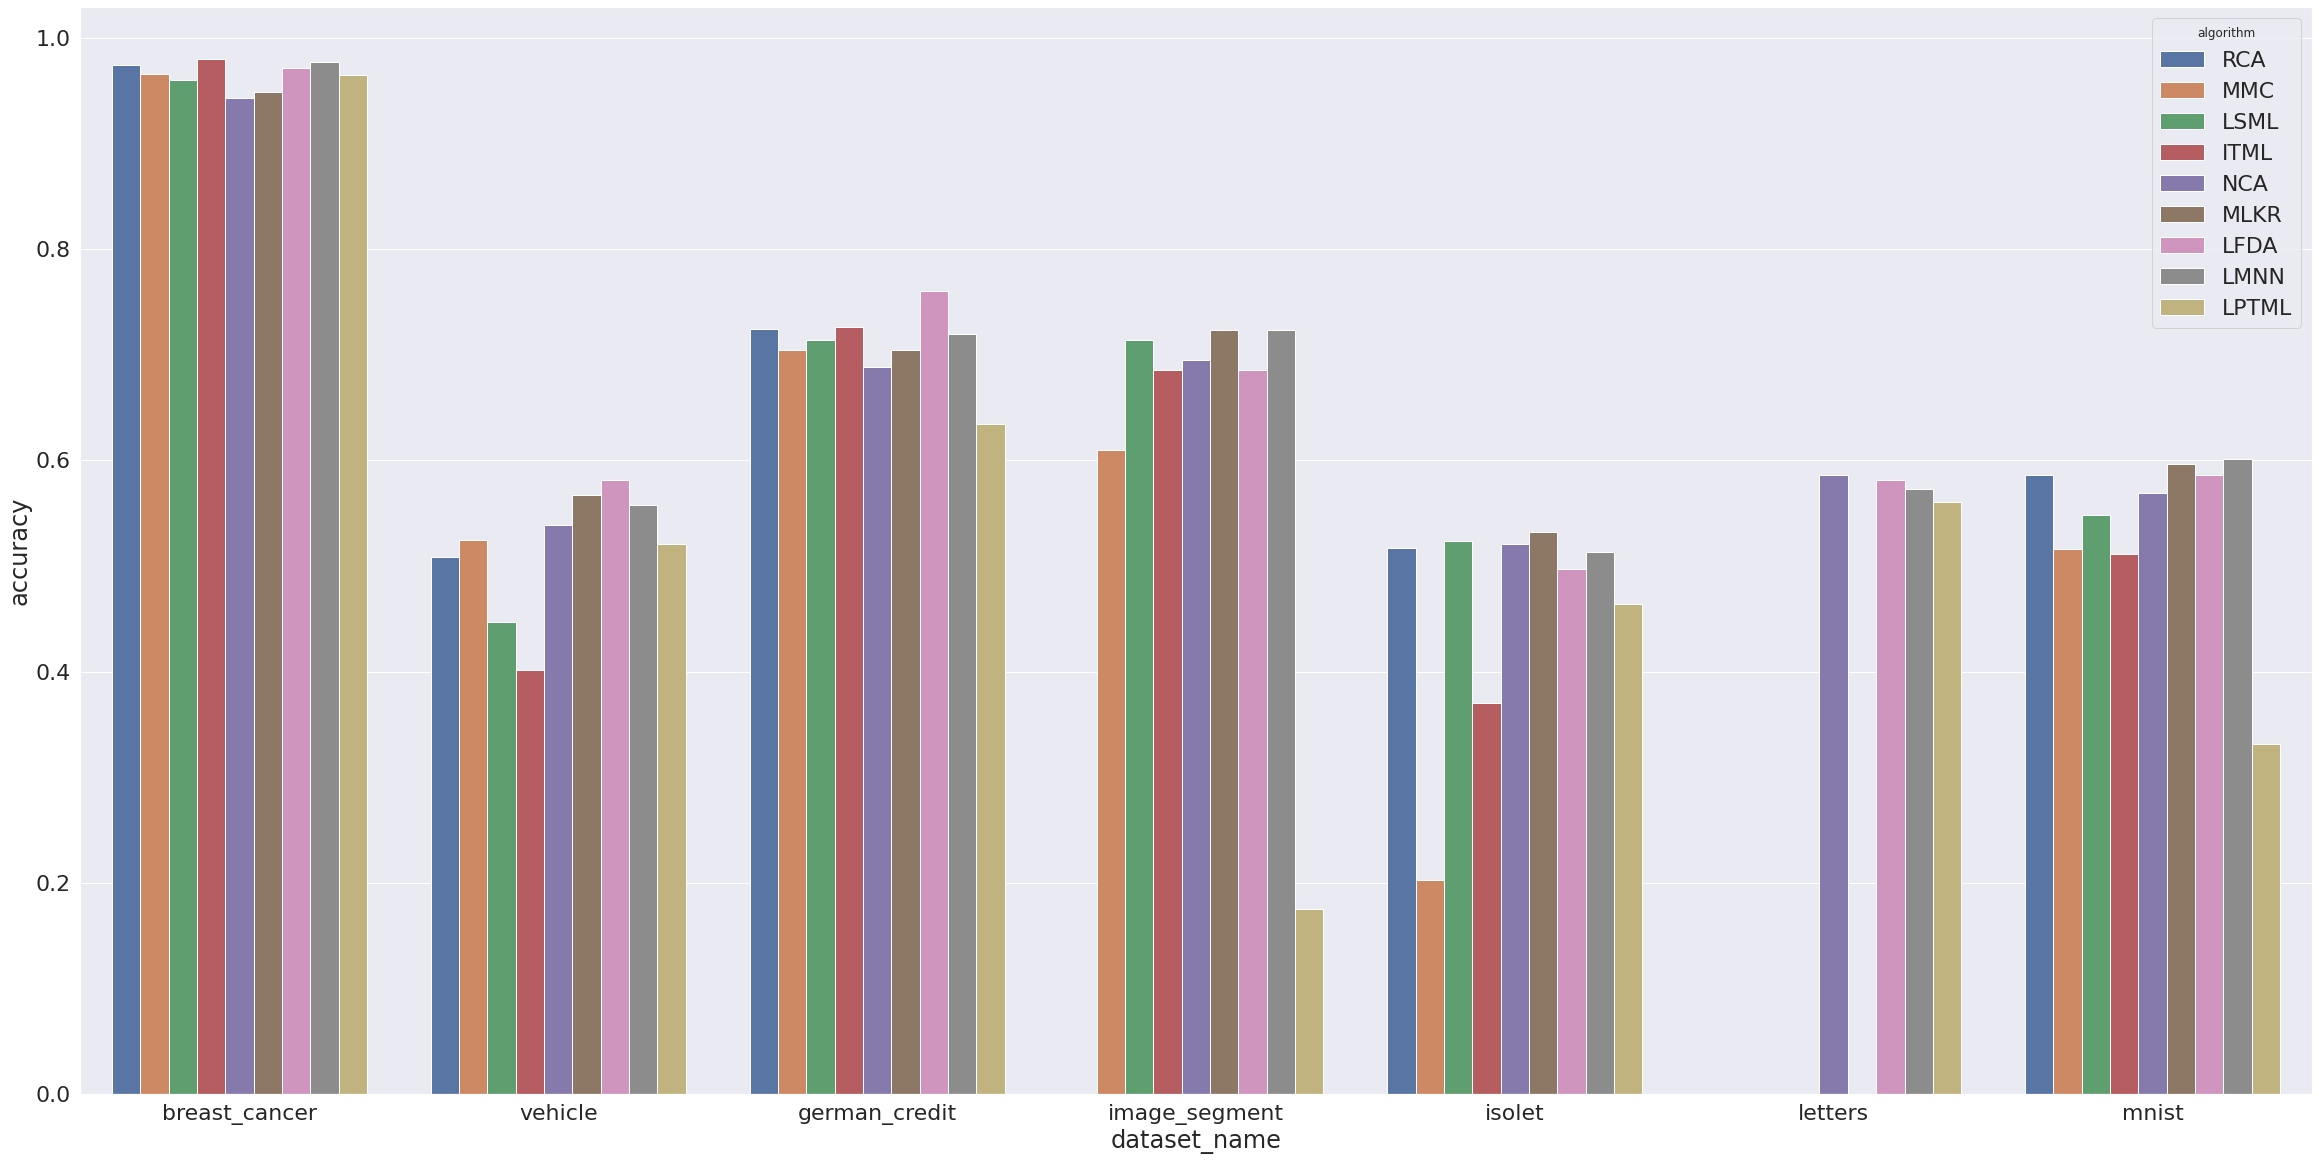

In [38]:
# Accuracy plot
plt.figure(figsize=(40, 20))
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "accuracy"]]
sns.barplot(x="dataset_name", y="accuracy", data=accuracy_df[accuracy_df["adversarial_noise"] == 0.3], hue="algorithm")


In [ ]:
sns.set(font_scale = 5)

g = sns.FacetGrid(accuracy_df, col="adversarial_noise", row="algorithm", sharex=False, sharey=False, height=30)
g.map(sns.barplot, "dataset_name", "accuracy").add_legend()
plt.savefig("final.png")